# Reductions

Dependencies for this notebook: `graphviz` executable installed on the system and on the path, [networkx](https://anaconda.org/anaconda/networkx), [graphviz python](https://anaconda.org/conda-forge/python-graphviz) and [pydotplus](https://anaconda.org/conda-forge/pydotplus) Anaconda packages. (See [here](https://graphviz.readthedocs.io/en/stable/index.html) for the documentation of the graphviz package.)


In [ ]:
%%html
<!--
<style>
.CodeMirror { width: 100vw; }
.prompt  { visibility: hidden; width: 0px !important; }
.prompt_container { visibility: hidden; width: 0px !important; }
.container {  width: 95% !important; }
.rendered_html { font-size:0.8em; }
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td { font-size: 100%;}
td { font-size: 16px }
</style>
-->

_Useful unicode symbols:_ φ   ∨   ∧   ¬   ≠    Ψ

### Utility code (skip reading but run this first)

In [ ]:
%run "Utilities.ipynb"
from IPython.display import clear_output
clear_output()

In [ ]:
import networkx as nx

import pydotplus

def nxgraph(G):
    P = pydotplus.graph_from_dot_data(G.source)
    return nx.drawing.nx_pydot.from_pydot(P)


## 3SAT $\leq_p$ ISET

In [ ]:
φ = "(x0 ∨ ¬x3 ∨ x2 ) ∧ (¬x0 ∨ x1 ∨ ¬x2 ) ∧ (x1 ∨ x2 ∨ ¬x3 )  "

In [ ]:
# Evaluate 3CNF φ on assignment x 
# Both are represented as strings
def evalcnf(φ,x):

    def varval(v):
        return (1-int(x[int(v[2:])])  if v[0]=="¬" else int(x[int(v[1:])]))
    
    for (v0,v1,v2) in getclauses(φ):
        # print(c+str([varval(v0),varval(v1),varval(v2)]))
        if not varval(v0)+varval(v1)+varval(v2): return False
    
    return True

# Clause list of a 3CNF φ
def getclauses(φ):
    clauses =  φ.split("∧")
    res = []
    for c in clauses:
        (v0,_,v1,_,v2) = c.strip()[1:-1].split()
        res.append((v0.strip(),v1.strip(),v2.strip()))
    return res
    

# number of variables of a formula φ
def numvars(φ):
    for n in range(len(φ)-1,0,-1):
        if φ.find('x'+str(n))>= 0: return n+1
    raise Exception


In [ ]:
numvars(φ)

In [ ]:
evalcnf(φ,"0101")

In [ ]:
print(φ)

__Question:__ Is φ satisfiable?

In [ ]:
evalcnf(φ,"1000")

## Some bigger instances (DIMACS format)

In [ ]:
def from_dimacs(cnf):
    φ = ""
    m = 0
    n = 0
    def var(idx): return f"x{int(idx)-1}" if int(idx)>0 else f"¬x{-int(idx)-1}"
    
    for line in cnf.split("\n"):
        if not line.strip() or line[0]=="c" or line[0]=="%" or line[0]=="0": continue
        if line[0]=="p":
            _,t,n_,m_ = line.split()
            if t!="cnf": raise Exception("Only handle CNF!")
            n = int(n_)
            m = int(m_)
            continue
        a,b,c,_ = line.split()
        if _ != "0": raise Exception("Only handle 3CNF!")
        φ += f"({var(a)} ∨ {var(b)} ∨ {var(c)} ) ∧ "
    φ = φ[:-3]
    return φ
        
            

In [ ]:
def from_dimacs_assign(assign):
    avals = {}
    n = 0
    for a in assign.split():
        if a == "v": continue
        a = int(a)
        if a>0:
            avals[a-1] = "1"
            n = max(n,a)
        if a<0:
            avals[-a-1] = "0"
            n = max(n,-a)
        if a == 0:
            break
    x = ""
    for i in range(n):
        x += avals[i]
    return x

In [ ]:
# from https://www.cs.ubc.ca/~hoos/SATLIB/benchm.html
cnf = r'''
c This Formular is generated by mcnf
c
c    horn? no 
c    forced? no 
c    mixed sat? no 
c    clause length = 3 
c
p cnf 20  91 
 4 -18 19 0
3 18 -5 0
-5 -8 -15 0
-20 7 -16 0
10 -13 -7 0
-12 -9 17 0
17 19 5 0
-16 9 15 0
11 -5 -14 0
18 -10 13 0
-3 11 12 0
-6 -17 -8 0
-18 14 1 0
-19 -15 10 0
12 18 -19 0
-8 4 7 0
-8 -9 4 0
7 17 -15 0
12 -7 -14 0
-10 -11 8 0
2 -15 -11 0
9 6 1 0
-11 20 -17 0
9 -15 13 0
12 -7 -17 0
-18 -2 20 0
20 12 4 0
19 11 14 0
-16 18 -4 0
-1 -17 -19 0
-13 15 10 0
-12 -14 -13 0
12 -14 -7 0
-7 16 10 0
6 10 7 0
20 14 -16 0
-19 17 11 0
-7 1 -20 0
-5 12 15 0
-4 -9 -13 0
12 -11 -7 0
-5 19 -8 0
1 16 17 0
20 -14 -15 0
13 -4 10 0
14 7 10 0
-5 9 20 0
10 1 -19 0
-16 -15 -1 0
16 3 -11 0
-15 -10 4 0
4 -15 -3 0
-10 -16 11 0
-8 12 -5 0
14 -6 12 0
1 6 11 0
-13 -5 -1 0
-7 -2 12 0
1 -20 19 0
-2 -13 -8 0
15 18 4 0
-11 14 9 0
-6 -15 -2 0
5 -12 -15 0
-6 17 5 0
-13 5 -19 0
20 -1 14 0
9 -17 15 0
-5 19 -18 0
-12 8 -10 0
-18 14 -4 0
15 -9 13 0
9 -5 -1 0
10 -19 -14 0
20 9 4 0
-9 -2 19 0
-5 13 -17 0
2 -10 -18 0
-18 3 11 0
7 -9 17 0
-15 -6 -3 0
-2 3 -13 0
12 3 -2 0
-2 -3 17 0
20 -15 -16 0
-5 -17 -19 0
-20 -18 11 0
-9 1 -5 0
-19 9 17 0
12 -2 17 0
4 -16 -5 0
%
0
'''

cnfsat = "v 1 -2 -3 -4 -5 6 -7 -8 -9 -10 -11 -12 13 14 15 -16 17 -18 -19 20 0"

In [ ]:
Ψ = from_dimacs(cnf)
Ψ

In [ ]:
print(φ)

In [ ]:
print(Ψ)

In [ ]:
numvars(Ψ)

In [ ]:
assign = from_dimacs_assign(cnfsat)
assign

In [ ]:
x_0 = '10000100000011101001'
x_1 = '11000100000011101001'
evalcnf(Ψ,x_0), evalcnf(Ψ,x_1) 

In [ ]:
evalcnf(Ψ,"10000100110011101001")

In [ ]:
from collections import defaultdict

In [ ]:
# Reduction SAT to Independent Set
def SAT2IS_(φ):
    n = numvars(φ) 
    G =Graph() 
    nodes =  defaultdict(list) 

    for c,C in enumerate(getclauses(φ)):
        for u in C: 
            def n(c,v): return f"{c}_{v}"
            vtx = n(c,u)
            nodes[u].append(vtx)
            G.node(vtx,f"{c}:{subscript(u)}")
            
            neg_u = u[1:] if u[0]=="¬" else "¬"+u
            for v in nodes[neg_u]: G.edge(vtx,v,color="red") 
            
        # add triangle edges
        G.edge(n(c,C[0]), n(c,C[1]),color="green")
        G.edge(n(c,C[1]), n(c,C[2]),color="green")
        G.edge(n(c,C[2]), n(c,C[0]),color="green")
    return G

In [ ]:
φ = "(x0 ∨ ¬x3 ∨ x2) ∧ (¬x0 ∨ x1 ∨ ¬x2) ∧ (¬x1 ∨ x2 ∨ x3) ∧ (¬x1 ∨ x0 ∨ x2)"
# How many vertices , green, and red edges will SAT2IS_(φ) have?

In [ ]:
SAT2IS_(φ)

In [ ]:
# same reduction but taking care of colors and keeping track what happens to an assignment
def SAT2IS(φ,x=""):
    S = []
#    G.node(u,style='filled',fillcolor=('red' if x and x[i]=="0" else 'green'))
        
    n = numvars(φ) 
    G =Graph() # (engine='neato')
    
    def nname(c,v): return f"({c},{v})"
    
    c = 0
    nodes = {}
    for i in range(n):
        nodes["x"+str(i)] = []
        nodes["¬x"+str(i)] = []
    
    for C in getclauses(φ):
        sat = False
        for u in C: 
            if x and (not sat) and (((u[0]=="¬") and (x[int(u[2:])]=="0")) or ((u[0]!="¬") and (x[int(u[1:])]=="1"))):
                G.node(nname(c,u),f"{c}:{subscript(u)}",fontsize="10",style='filled',fillcolor='lightblue')
                S.append(nname(c,u))
                sat = True
            else:
                G.node(nname(c,u),f"{c}:{subscript(u)}",fontsize="10")
            negu = u[1:] if u[0]=="¬" else "¬"+u
            for v in nodes[negu]: G.edge(nname(c,u),v,color="red") 
            nodes[u].append(nname(c,u))
        G.edge(nname(c,C[0]), nname(c,C[1]),color="green")
        G.edge(nname(c,C[1]), nname(c,C[2]),color="green")
        G.edge(nname(c,C[0]), nname(c,C[2]),color="green")
        c += 1
    
    return (scale(G) if not x else (scale(G),S))

In [ ]:
φ = "(x0 ∨ ¬x3 ∨ x2) ∧ (¬x0 ∨ x1 ∨ ¬x2) ∧ (¬x1 ∨ x2 ∨ x3)"
print(evalcnf(φ,"0110"))
(G,S) = SAT2IS(φ,"0110")
G

In [ ]:
SAT2IS(Ψ)

In [ ]:
SAT2IS(Ψ,assign)[0]

## Proof by program

In [41]:
def recoverassignment(G,S,n):
    """Transform independent set S for G into a satisfying assignment for original formula"""
    x = [0]*n
    for i in range(n):
        for v in S: 
            if v.find(f",x{i}")>=0: x[i]=1
    return x

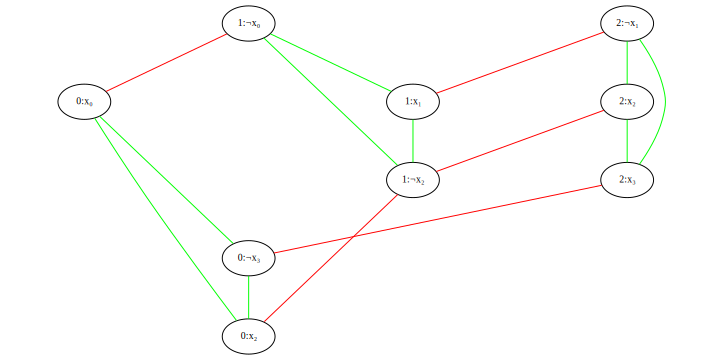

In [42]:
φ = "(x0 ∨ ¬x3 ∨ x2) ∧ (¬x0 ∨ x1 ∨ ¬x2) ∧ (¬x1 ∨ x2 ∨ x3)"
G = SAT2IS(φ)
G

In [43]:
recoverassignment(G,['(0,¬x3)', '(1,¬x0)', '(2,x2)'],4)

[0, 0, 1, 0]